#### @ Author 3x Group
Logistic Regression Classification

| Model Name | Accuaracy | Kappa Score | ROC AUC Curve value |
| ------------ | ---------------- | ---------------- | ---------------- | 
| Logistic Regression with all the data |	87.5% | 0.65 | 0.397 |	
| Logistic Regression with smote data | 83% | 0.83 | 0.66 |	
| Logistic Regression with variables selected from backward elimination  | 78.93% | 0.79 | 0.57 |
| Logistic Regression with variables selected from cfs subset eval  | 85.85% | 0.56 | 0.17 |

In [58]:
#Loading all Packages
print("==================== BLOCK 1 Started! ======================")

import pymysql
import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
from imblearn.over_sampling import SMOTE
import numpy as np
n=40
import warnings
warnings.filterwarnings('ignore')
import time
import sklearn
from sklearn import svm
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
%matplotlib inline
r_state=52
print("==================== Packages Loaded ======================")

==================== BLOCK 1 Started! ======================
==================== Packages Loaded ======================


In [28]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('MainEncodedData.csv')
del df['Unnamed: 0']
df.info()
print("==================== Data Loaded In ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 51 columns):
Age                                  1470 non-null int64
Attrition                            1470 non-null int64
BusinessTravel                       1470 non-null int64
DailyRate                            1470 non-null int64
DistanceFromHome                     1470 non-null int64
Education                            1470 non-null int64
EmployeeCount                        1470 non-null int64
EmployeeNumber                       1470 non-null int64
EnvironmentSatisfaction              1470 non-null int64
HourlyRate                           1470 non-null int64
JobInvolvement                       1470 non-null int64
JobLevel                             1470 non-null int64
JobSatisfaction                      1470 non-null int64
MonthlyIncome                        1470 non-null int64
MonthlyRate                          1

In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,...,YearsSinceLastPromotion,YearsWithCurrManager,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,...,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,2,279,8,1,1,2,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,...,1,7,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,2,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,...,3,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,1,591,2,1,1,7,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,...,2,2,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [30]:
df.shape

(1470, 51)

In [31]:
start_time = time.time()

train, test = sklearn.cross_validation.train_test_split(df, train_size = 0.75)
train, val = sklearn.cross_validation.train_test_split(train, train_size = 0.75)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Validation Set :",val['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(train.columns[1], axis = 1)
x_val=val.drop(val.columns[1], axis = 1)
x_test=test.drop(test.columns[1], axis = 1)
y_train=train['Attrition']
y_val=val['Attrition']
y_test=test['Attrition']

For Main Data Set : 1470
For Train Set : 826
For Validation Set : 276
For Test Set : 368


Acc Train: 0.831719, Acc Val:0.865942
Acc Train: 0.831719, Acc Val:0.865942
Acc Train: 0.832930, Acc Val:0.869565
Acc Train: 0.841404, Acc Val:0.869565
Acc Train: 0.859564, Acc Val:0.873188
Acc Train: 0.883777, Acc Val:0.887681
Acc Train: 0.889831, Acc Val:0.884058
Acc Train: 0.888620, Acc Val:0.891304
Acc Train: 0.875303, Acc Val:0.880435
Acc Train: 0.889831, Acc Val:0.887681
Acc Train: 0.882567, Acc Val:0.898551
Acc Train: 0.891041, Acc Val:0.894928
Acc Train: 0.886199, Acc Val:0.891304


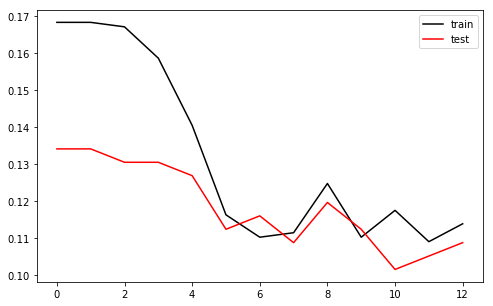

In [32]:
C_values = [0.00075,0.001,0.005,0.01,0.05,0.1,0.5,1.0,5.0,10.0,50.0,100.0,500.0]
prediction_error = []
train_error = []

for C_val in C_values:
    clf = LogisticRegression(C=C_val,max_iter=10000,random_state=52)
    clf.fit(x_train, y_train)
    score_train = clf.score(x_train, y_train)
    score_test = clf.score(x_val,y_val)
    train_error.append(1-score_train)
    prediction_error.append(1-score_test)
    #val_error.append(1-score_val) 
    print("Acc Train: %f, Acc Val:%f"%(score_train,score_test))
plt.figure(1, figsize=(8, 5))
plt.clf()
plt.plot(range(len(C_values)),train_error,color='k',label='train')
plt.plot(range(len(C_values)),prediction_error,color='r',label='test')
plt.legend(loc=1)
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=50,max_iter=750,random_state=52)
logreg.fit(x_train, y_train)

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=750, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=52, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=52)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.863


In [35]:
logreg = LogisticRegression(random_state=52,C=8)
logreg.fit(x_train, y_train)

LogisticRegression(C=8, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=52, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
logreg = LogisticRegression(random_state=52)
logreg.fit(x_train, y_train)
start_time = time.time()

model=logreg
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True         0   1
Predicted         
0          303  42
1            4  19
             precision    recall  f1-score   support

          0       0.88      0.99      0.93       307
          1       0.83      0.31      0.45        61

avg / total       0.87      0.88      0.85       368

0.875
Duration: --- 0.00011642773946126302 Minutes ---


ROC AUC: 0.65


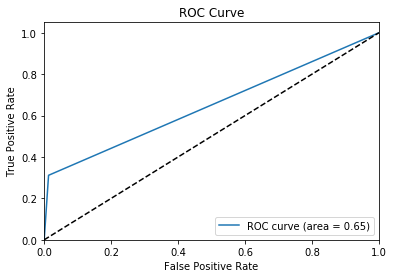

In [46]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [47]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred)

0.39770867430441903

## Now on smote Data

In [64]:
print("==================== Data Loading ======================")
start_time = time.time()
df=pd.read_csv('SmoteData_1.csv')
del df['Unnamed: 0']
df.info()
print("==================== Data Loaded In ======================")
print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

==================== Data Loading ======================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 51 columns):
Age                                  2465 non-null float64
BusinessTravel                       2465 non-null float64
DailyRate                            2465 non-null float64
DistanceFromHome                     2465 non-null float64
Education                            2465 non-null float64
EmployeeCount                        2465 non-null float64
EmployeeNumber                       2465 non-null float64
EnvironmentSatisfaction              2465 non-null float64
HourlyRate                           2465 non-null float64
JobInvolvement                       2465 non-null float64
JobLevel                             2465 non-null float64
JobSatisfaction                      2465 non-null float64
MonthlyIncome                        2465 non-null float64
MonthlyRate                          2465 non-null float64
NumCompani

In [66]:
df.shape

(2465, 51)

In [68]:
start_time = time.time()

train, test = sklearn.cross_validation.train_test_split(df, train_size = 0.7)
print("For Main Data Set :",df['Attrition'].count())
print("For Train Set :",train['Attrition'].count())
print("For Test Set :",test['Attrition'].count())

x_train=train.drop(df.columns[50], axis = 1)
x_test=test.drop(df.columns[50], axis = 1)
y_train=train['Attrition']
y_test=test['Attrition']

For Main Data Set : 2465
For Train Set : 1725
For Test Set : 740


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.836


In [72]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
start_time = time.time()

model=logreg
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))

print("Duration: --- %s Minutes ---" % ((time.time() - start_time)/60))

True         0    1
Predicted          
0          307   48
1           76  309
             precision    recall  f1-score   support

          0       0.86      0.80      0.83       383
          1       0.80      0.87      0.83       357

avg / total       0.83      0.83      0.83       740

0.8324324324324325
Duration: --- 0.00028069416681925454 Minutes ---


ROC AUC: 0.83


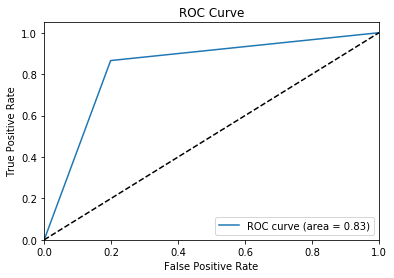

In [74]:
fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [75]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test,pred)

0.6653415514789015

#### From here it is clear our smote data is to close to the training data and its overfitting hence smote data is unreliable

#### Based on feature selection part Backward elimination from SAS
###### Not using gender due to GDPR

In [56]:
df=df[["Attrition","BusinessTravel","EducationField_Human Resources","EducationField_Life Sciences","EducationField_Marketing",
      "EducationField_Medical","EducationField_Other","EducationField_Technical Degree","EnvironmentSatisfaction",
      "JobInvolvement","JobLevel","JobRole_Healthcare Representative","JobRole_Human Resources","JobRole_Laboratory Technician",
      "JobRole_Manager","JobRole_Manufacturing Director","JobRole_Research Director","JobRole_Research Scientist",
       "JobRole_Sales Executive","JobRole_Sales Representative","OverTime","RelationshipSatisfaction","StockOptionLevel",
      "WorkLifeBalance","Age","DistanceFromHome","NumCompaniesWorked","TotalWorkingYears","MonthlyIncome"]]

In [59]:
X = df.drop(df.columns[0], axis = 1) # drop the last column
y = df['Attrition'] # drop all the columns but the
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=r_state) # default Train 0.75- Test 0.25
print("There are {} samples in the training dataset".format(x_train.shape[0]))
print("There are {} samples in the testing dataset".format(x_test.shape[0]))
print("Each sample has {} features".format(x_train.shape[1]))
y_train = y_train.values
y_test = y_test.values

There are 1848 samples in the training dataset
There are 617 samples in the testing dataset
Each sample has 28 features


True         0    1
Predicted          
0          235   63
1           67  252
             precision    recall  f1-score   support

          0       0.79      0.78      0.78       302
          1       0.79      0.80      0.79       315

avg / total       0.79      0.79      0.79       617

0.7893030794165316
ROC AUC: 0.79


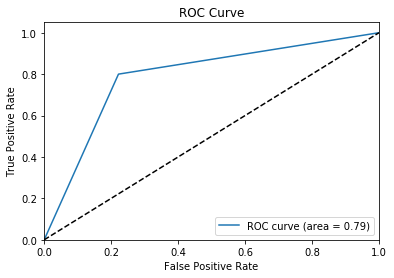

Kappa score is :0.5783037516823688


In [60]:
logreg = LogisticRegression(random_state=52)
logreg.fit(x_train, y_train)
start_time = time.time()

model=logreg
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))


fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))

#### Based on CFS subset eval done in weka

In [61]:
df=pd.read_csv('MainEncodedData.csv')
del df['Unnamed: 0']
df=df[["Attrition","Age","BusinessTravel","EnvironmentSatisfaction","JobInvolvement","JobLevel","JobRole_Healthcare Representative","JobRole_Human Resources","JobRole_Laboratory Technician",
      "JobRole_Manager","JobRole_Manufacturing Director","JobRole_Research Director","JobRole_Research Scientist",
       "JobRole_Sales Executive","JobRole_Sales Representative","JobSatisfaction","MonthlyIncome","OverTime","StockOptionLevel",
       "TotalWorkingYears","WorkLifeBalance","YearsAtCompany","YearsWithCurrManager"]]

In [62]:
X = df.drop(df.columns[0], axis = 1) # drop the last column
y = df['Attrition'] # drop all the columns but the
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=r_state) # default Train 0.75- Test 0.25
print("There are {} samples in the training dataset".format(x_train.shape[0]))
print("There are {} samples in the testing dataset".format(x_test.shape[0]))
print("Each sample has {} features".format(x_train.shape[1]))
y_train = y_train.values
y_test = y_test.values

There are 1102 samples in the training dataset
There are 368 samples in the testing dataset
Each sample has 22 features


True         0   1
Predicted         
0          309  49
1            3   7
             precision    recall  f1-score   support

          0       0.86      0.99      0.92       312
          1       0.70      0.12      0.21        56

avg / total       0.84      0.86      0.81       368

0.8586956521739131
ROC AUC: 0.56


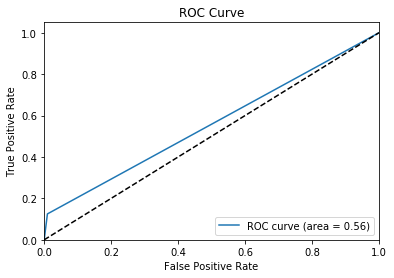

Kappa score is :0.17403314917127077


In [63]:
logreg = LogisticRegression(random_state=52)
logreg.fit(x_train, y_train)
start_time = time.time()

model=logreg
pred=model.predict(x_test)
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=model.classes_,
                     columns=model.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print(cm_df)
print(classification_report(y_test, pred))
print(model.score(x_test,y_test))


fpr, tpr, _ = roc_curve(y_test, pred)
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import cohen_kappa_score
print("Kappa score is :"+str(cohen_kappa_score(y_test,pred)))